## Short description of the notebook

This notebook was created and ran in google colab.

This is an amendment to the main notebook. For further documantion, one shall see the main notebook.

In this notebook, artifical noise is added to the original dataset from a random normal distribution.

The notebook requires two files:
 - NearFieldData_no_rep_4.txt: the waves in the first 8 angles
 - NearFieldData_4_reduced_newangle_rev20_dec.txt: the waves in the second 8 angles

The notebook creates one file:
 - Noisy_NearFieldData.txt: the origina ldata with noise

## Importing the necessary libraries

In [ ]:
# Basic calculations and plotting 
import numpy as np
import matplotlib.pyplot as plt

# Generating random numbers
import random

# Prerocessing the data, splitting the dataset, calculating the accuracy
from sklearn import preprocessing
import skimage.measure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creating the NN
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Permute, Dense, Activation, LocallyConnected2D, Reshape, Flatten, Dropout, Input, Conv2D
from tensorflow.keras.models import Sequential, Model
import tensorflow.keras.optimizers

## Loading and preprocessing the data

In [ ]:
# Importing the dataset

x1 = np.genfromtxt("NearFieldData_no_rep_4.txt", delimiter=' ')
x2 = np.genfromtxt("NearFieldData_4_reduced_newangle_rev20_dec.txt", delimiter=' ')

In [ ]:
# Creating some lists to store the new datasets

dataset = []

# Separating the dataset into list of lists

for i in range(0,8):
    dataset.append(x1[735*(i):735*(i+1)])

for i in range(0,8):
    dataset.append(x2[735*(i):735*(i+1)])

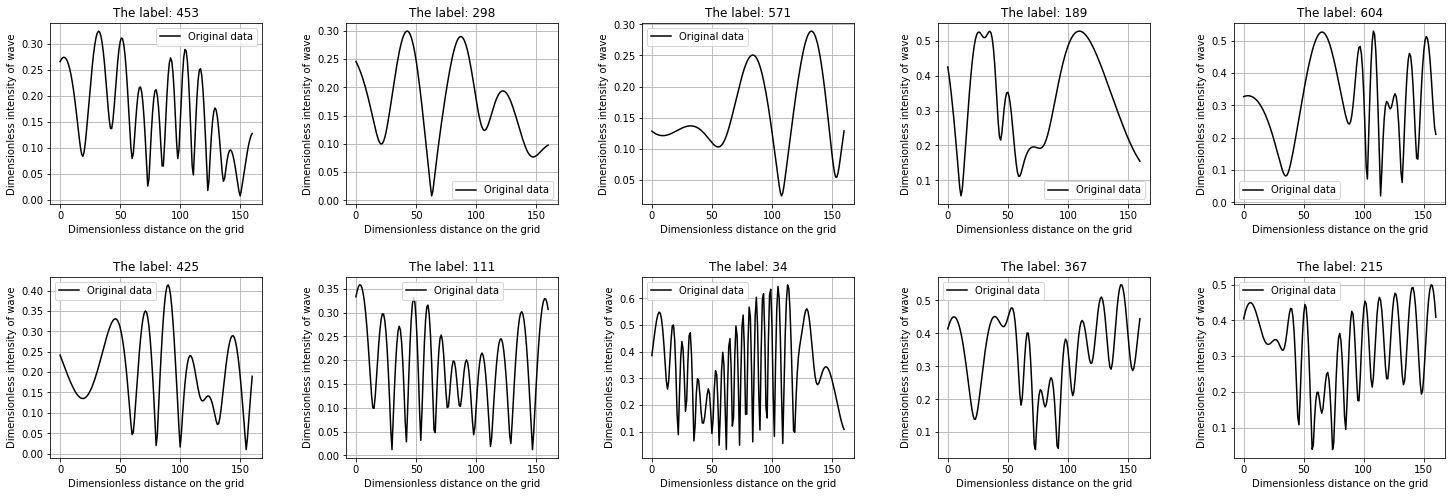

In [ ]:
# Plotting some example waves
# Selecting some random indices

indices = random.sample(range(1, len(dataset[0])), 10)

# Creating a plot of the results

fig, axs = plt.subplots(2,5, figsize=(25, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

axs = axs.ravel()

for i in range(0,10):

    axs[i].plot(dataset[0][indices[i]], color = 'black', label = 'Original data')
    axs[i].set_title('The label: ' + str(indices[i]))
    axs[i].set_xlabel('Dimensionless distance on the grid')
    axs[i].set_ylabel('Dimensionless intensity of wave')
    axs[i].grid()
    axs[i].legend()

plt.show()

In [ ]:
# Adding noise to the data

x_noisy_dataset = []

for i in range(0,len(dataset)):

  mu, sigma = 0, np.std(dataset[i])/5
  noise = np.random.normal(mu, sigma, np.shape(dataset[i]))
  x_temp = dataset[i] + noise

  # Storing the noisy data 
  x_noisy_dataset.append(x_temp)

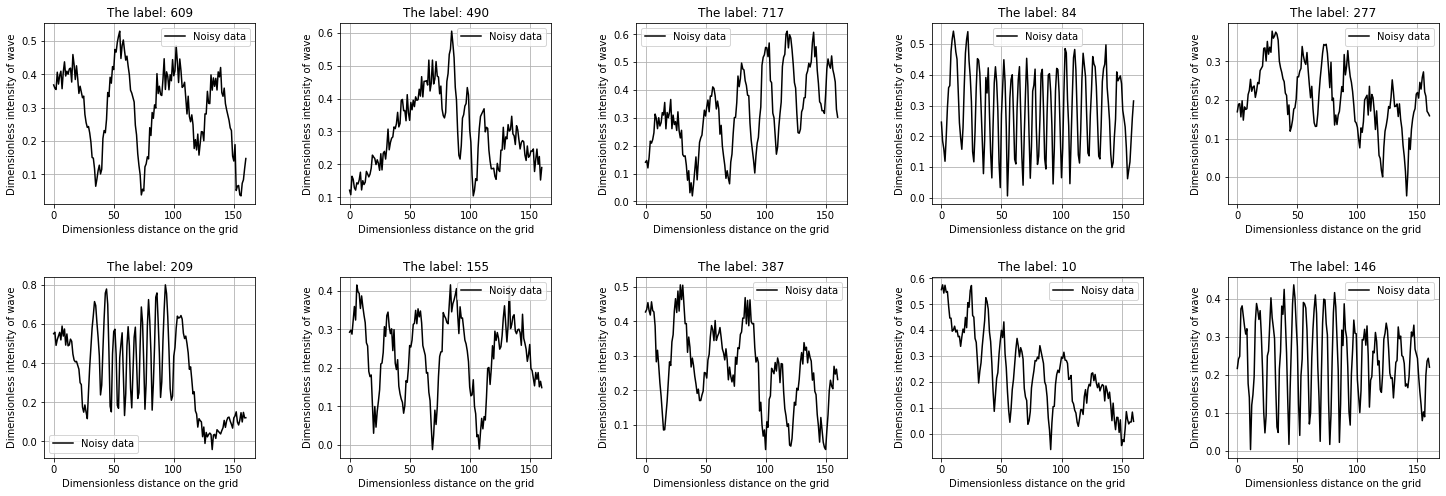

In [ ]:
# Plotting some example waves
# Selecting some random indices

indices = random.sample(range(1, len(dataset[0])), 10)

# Creating a plot of the results

fig, axs = plt.subplots(2,5, figsize=(25, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

axs = axs.ravel()

for i in range(0,10):

    axs[i].plot(x_noisy_dataset[1][indices[i]], color = 'black', label = 'Noisy data')
    axs[i].set_title('The label: ' + str(indices[i]))
    axs[i].set_xlabel('Dimensionless distance on the grid')
    axs[i].set_ylabel('Dimensionless intensity of wave')
    axs[i].grid()
    axs[i].legend()

plt.show()

## Saving the noise data in txt files

In [ ]:
# Transforming the dimensions to it's easier to write the dataset to a txt file

data_to_txt = []

for j in range(0,len(x_noisy_dataset)):
  for i in range(0,len(x_noisy_dataset[j])):
    data_to_txt.append(x_noisy_dataset[j][i])
    
data_to_txt = np.array(data_to_txt)

In [ ]:
# Saving the matrix to a txt file

np.savetxt("Noisy_NearFieldData.txt", data_to_txt, fmt="%s")